In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/work/waze_dataset.csv')

In [17]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,1.0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,0.0
1,1,1.0,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,1.0
2,2,1.0,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,0.0
3,3,1.0,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,1.0
4,4,1.0,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,0.0


In [4]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


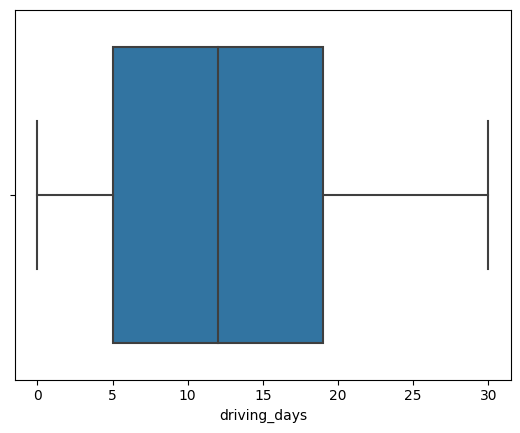

In [89]:
sns.boxplot(x=df.driving_days)
plt.show()

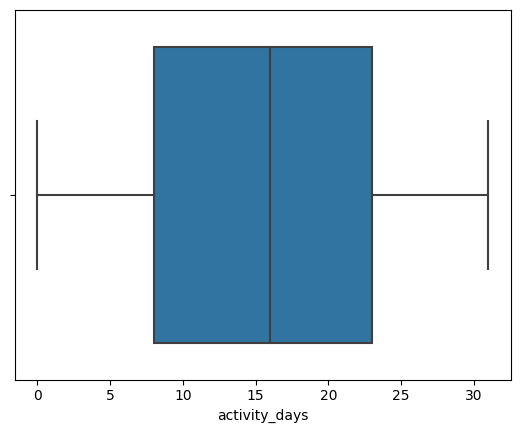

In [88]:
sns.boxplot(x=df.activity_days)
plt.show()

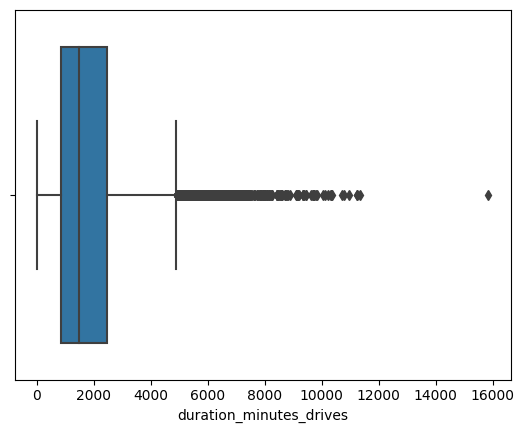

In [87]:
sns.boxplot(x=df.duration_minutes_drives)
plt.show()

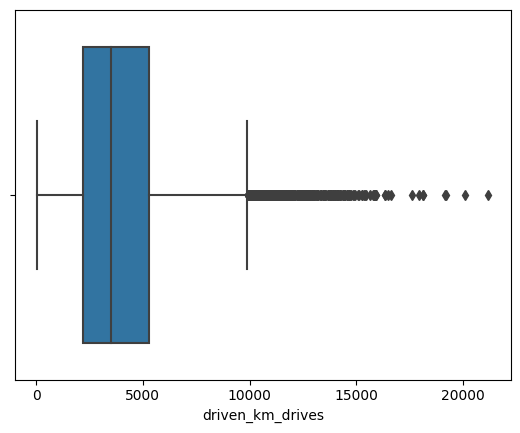

In [86]:
sns.boxplot(x=df.driven_km_drives)
plt.show()

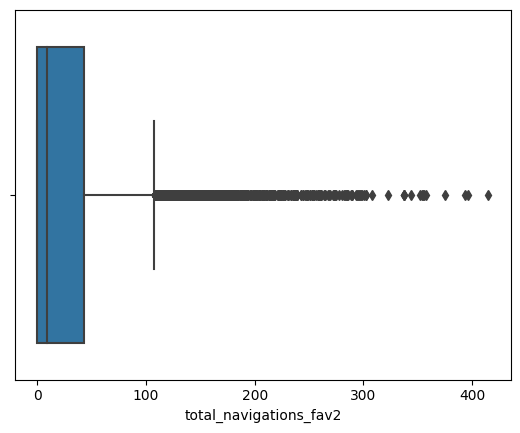

In [85]:
sns.boxplot(x=df.total_navigations_fav2)
plt.show()

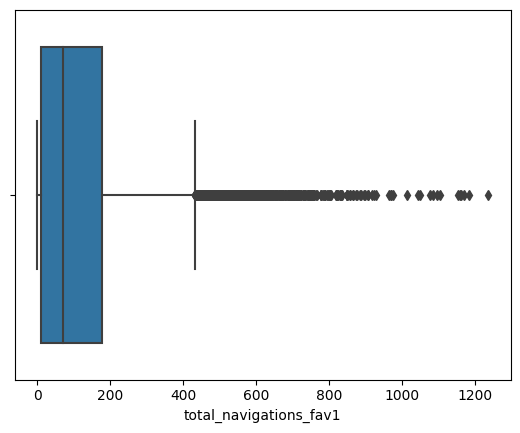

In [84]:
sns.boxplot(x=df.total_navigations_fav1)
plt.show()

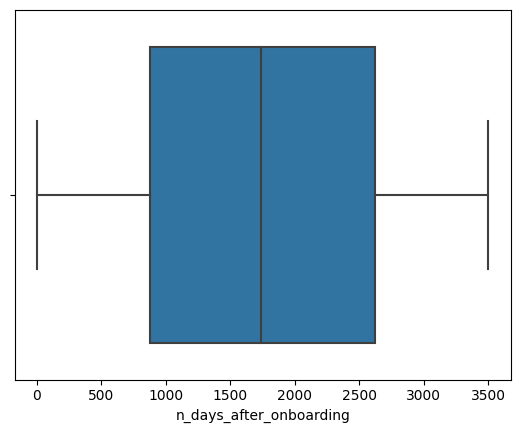

In [82]:
sns.boxplot(x=df.n_days_after_onboarding)
plt.show()

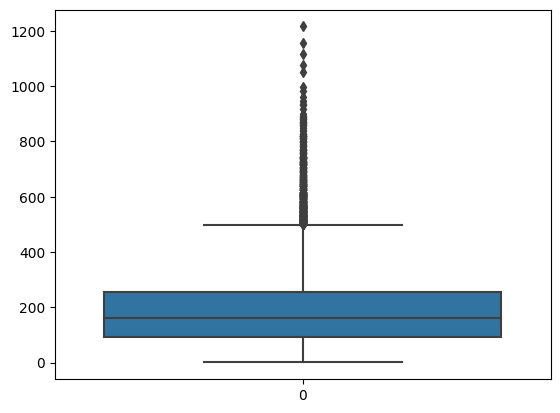

In [81]:
sns.boxplot(df.total_sessions)
plt.show()

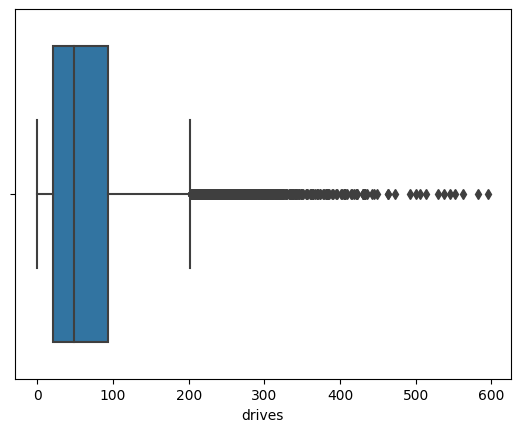

In [80]:
sns.boxplot(x=df.drives)
plt.show()

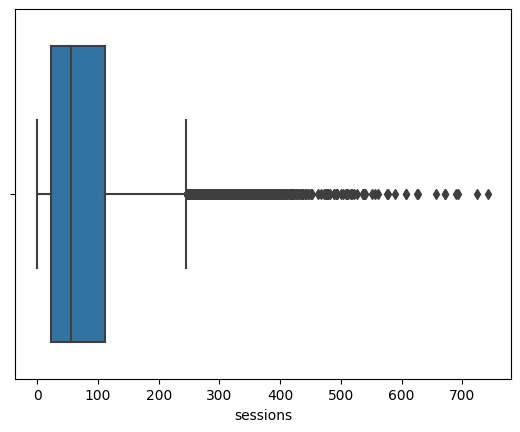

In [74]:
sns.boxplot(x=df.sessions)
plt.show()sns

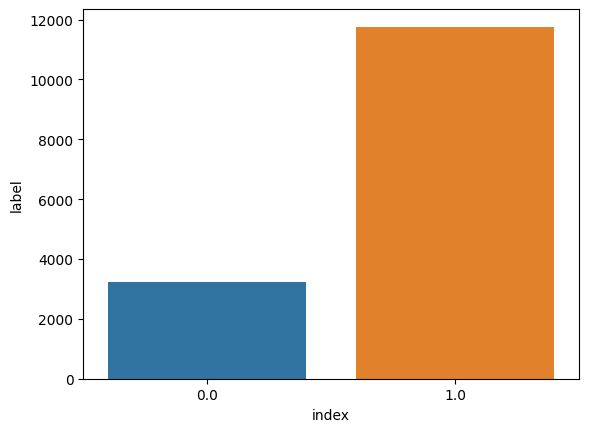

In [64]:
df_label = df.label.value_counts().reset_index()
sns.barplot(data=df_label,x='index',y='label')
plt.show()

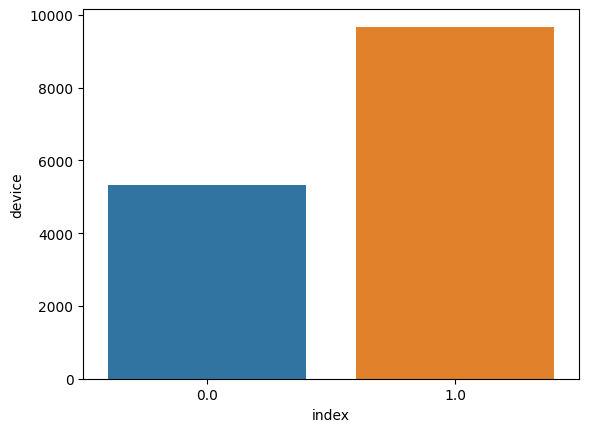

In [66]:
df_device = df.device.value_counts().reset_index()
sns.barplot(data=df_device,x='index',y='device')
plt.show()

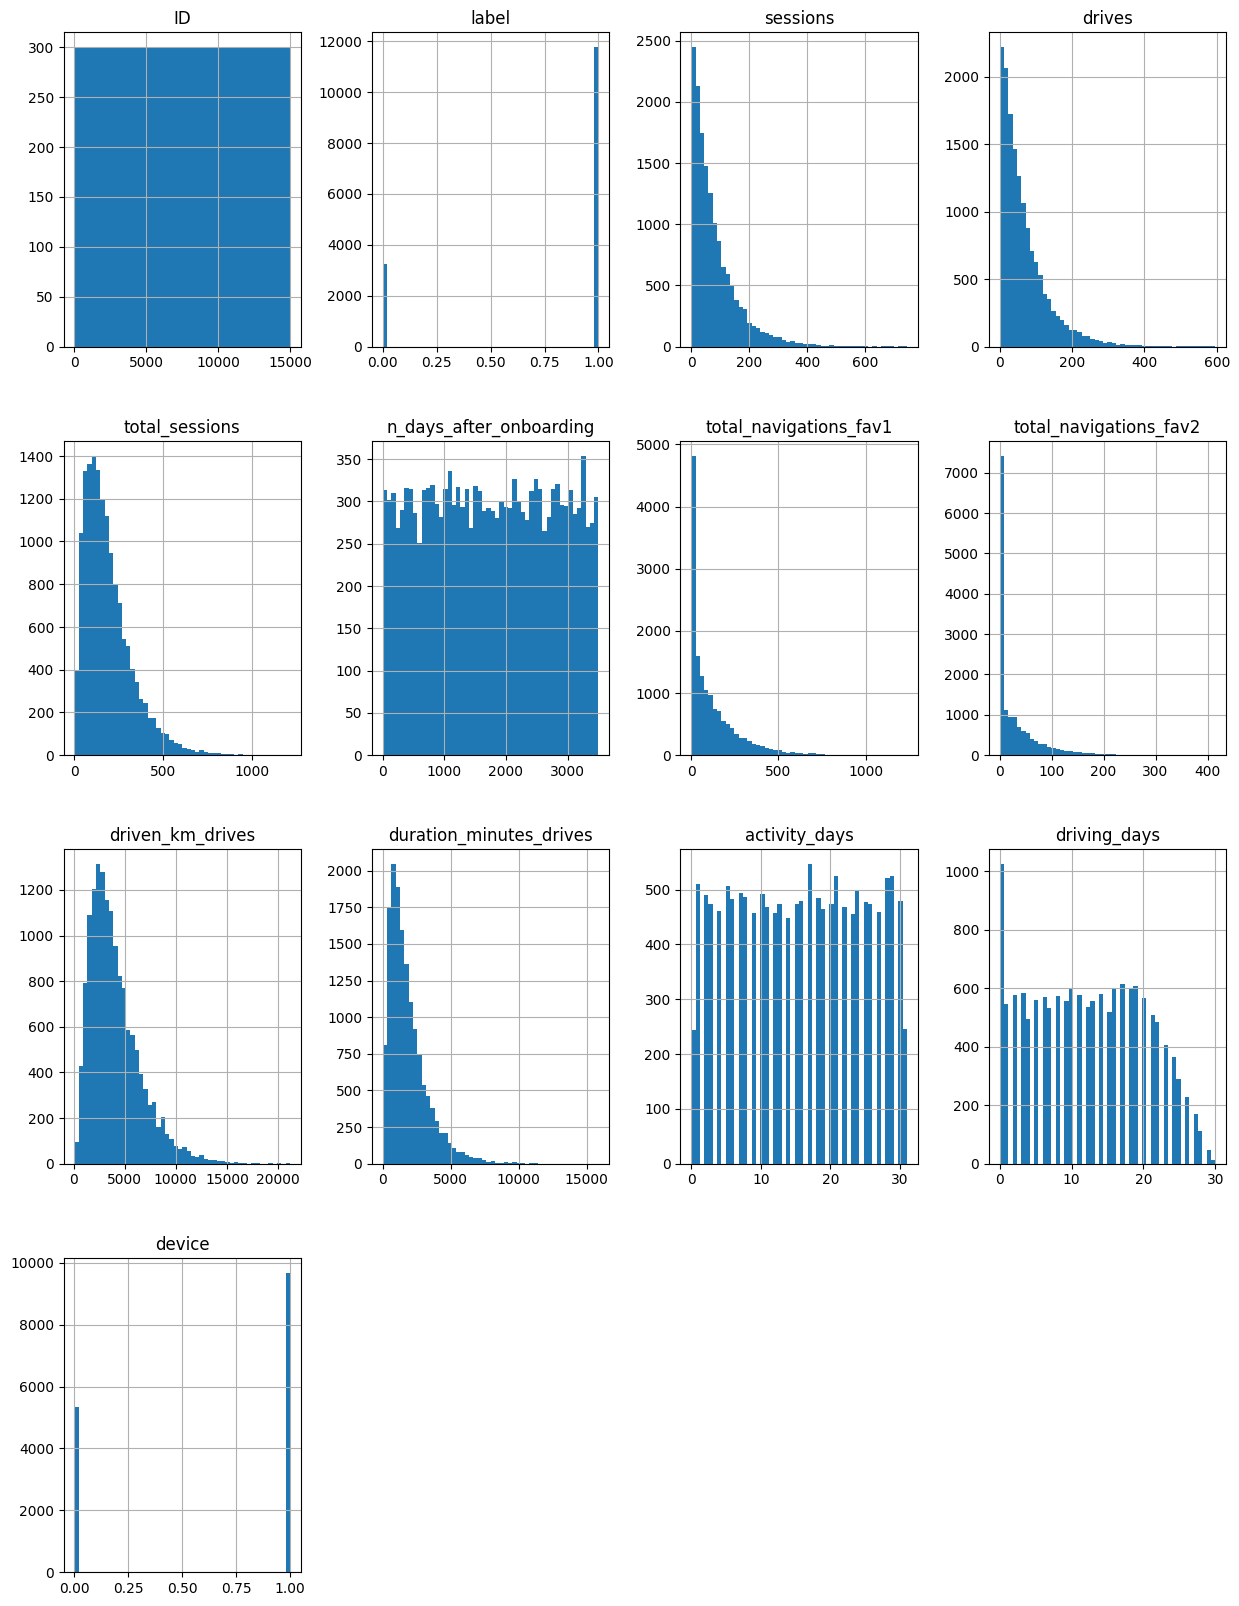

In [55]:
df.hist(bins=50,figsize=(15,20))
plt.show()

In [6]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np


In [13]:
df['label'] = OneHotEncoder(drop='first').fit_transform(df[['label']]).toarray()

In [15]:
df['device'] = OneHotEncoder(drop='first').fit_transform(df[['device']]).toarray()

In [16]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,1.0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,0.0
1,1,1.0,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,1.0
2,2,1.0,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,0.0
3,3,1.0,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,1.0
4,4,1.0,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,0.0


In [25]:
df_corr = df.corr()
label_corr = df_corr['label']
label_corr

ID                        -0.001905
label                      1.000000
sessions                  -0.033931
drives                    -0.034875
total_sessions            -0.027966
n_days_after_onboarding    0.118200
total_navigations_fav1    -0.047209
total_navigations_fav2    -0.019170
driven_km_drives          -0.013027
duration_minutes_drives   -0.027364
activity_days              0.270926
driving_days               0.261467
device                    -0.001791
Name: label, dtype: float64

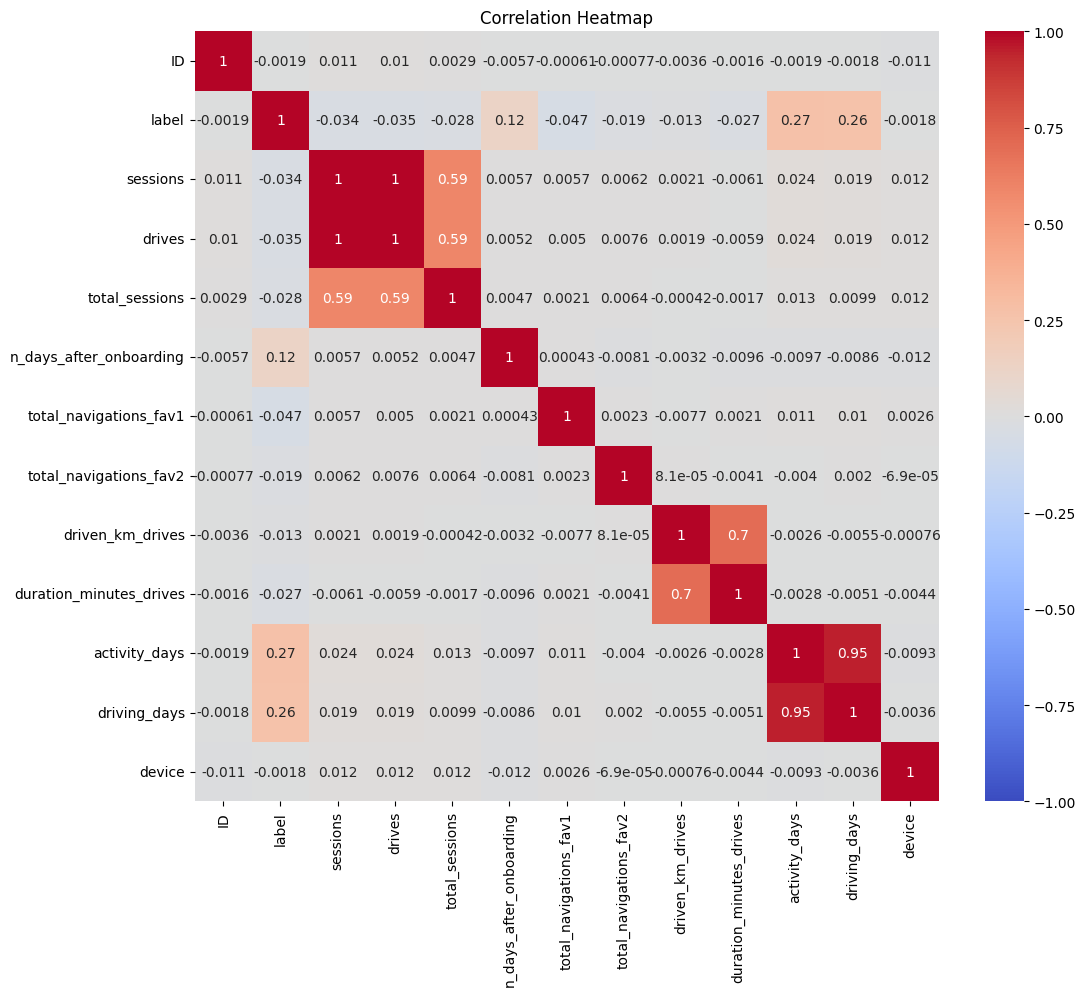

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
X = df.drop('label',axis=1)
y = df['label']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LogisticRegression().fit(x_train,y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
print(f"Training set shape: {x_train.shape}")
print(f"Testing set shape: {x_test.shape}")

Training set shape: (11999, 12)
Testing set shape: (3000, 12)


In [50]:
print(f"intercept:{model.intercept_}")
print(f"coefficient:{model.coef_}")
print(f"predicted labels :{model.predict(x_test)}")
print(f"predicted probabilities: {model.predict_proba(x_test)[::,-1]}")

intercept:[0.000586]
coefficient:[[ 1.14561272e-06 -7.78928978e-04 -3.37288929e-04 -2.12040693e-04
   3.24640480e-04 -8.40372767e-04 -1.05608125e-03  1.66123495e-06
  -4.68227249e-05  4.76177181e-02  3.92905227e-02  3.70093003e-04]]
predicted labels :[1. 1. 1. ... 1. 1. 1.]
predicted probabilities: [0.87132332 0.63397465 0.82593599 ... 0.89746899 0.72812883 0.79144387]


In [37]:
y_pred = model.predict(x_test)

In [53]:
#In order to understand and interpret the numbers in the below confusion matrix, it is important to keep the following in mind:

#The upper-left quadrant displays the number of true negatives.
#The bottom-left quadrant displays the number of false negatives.
#The upper-right quadrant displays the number of false positives.
#The bottom-right quadrant displays the number of true positives.

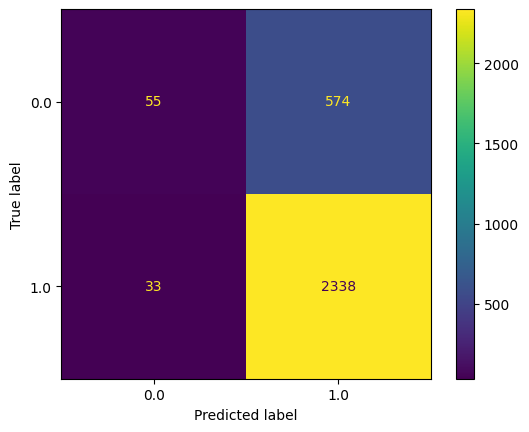

In [51]:
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(y_test, y_pred, labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model.classes_)
disp.plot()

In [54]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.80


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=85e12974-2590-4607-b055-c92c858e6f13' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>